<a href="https://colab.research.google.com/github/GiladitasdL/Desafio-Telecom-X-Parte-1/blob/main/TelecomX_LATAM_Eleonora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

 Importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
#Elegi colores personalizados para empezar
churn_colors = {True: "#E74C3C", False: "#2ECC71"}  # rojo = churn-abandona, verde = no churn- no abandona


#Para usar la API externa, uso la URL raw del repo de Ingrid.
url_desde_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url_desde_api)
data = response.json()


# Funciones utiles

In [2]:
def resumen_churn(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Resumen de una columna categórica vs distribución porcentual de abandono (Churn).
    Devuelve tabla con porcentajes de abandono.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene la columna 'Churn' y la columna categórica de interés.
    col : str
        Nombre de la columna categórica a analizar frente a Churn.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    tabla : pd.DataFrame
        DataFrame con los porcentajes de clientes que abandonan o permanecen,
        desglosado por categorías de la columna seleccionada.
    """
    tabla = (
        df.groupby(col)["Churn"]
        .value_counts(normalize=True)
        .mul(100)
        .rename("porcentaje")
        .reset_index()
    )
    return tabla


In [3]:
def grafico_barra_churn(df: pd.DataFrame, col: str, titulo: str = None):
    """
    Grafica barras apiladas mostrando distribución de Churn por categoría.
    """
    tabla = (
        df.groupby(col)["Churn"]
        .value_counts(normalize=True)
        .mul(100)
        .rename("porcentaje")
        .reset_index()
    )
    tabla = tabla.pivot(index=col, columns="Churn", values="porcentaje").fillna(0)

    # Ordenar categorías según abandono (True)
    tabla = tabla.sort_values(by=True, ascending=False)

    tabla.plot(
        kind="barh",
        stacked=True,
        color=[churn_colors[False], churn_colors[True]],
        figsize=(8, 5),
        edgecolor="black"
    )
    plt.xlabel("Porcentaje (%)")
    plt.ylabel(col)
    plt.title(titulo if titulo else f"Churn según {col}", fontsize=14, pad=15)
    plt.legend(title="Churn", labels=["No abandona", "Abandona"])
    plt.show()


In [4]:
def grafico_boxplot(df: pd.DataFrame, col: str, titulo: str = None):
    """
    Boxplot de una variable numérica vs Churn.
    """
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df, x="Churn", y=col, hue="Churn", palette=churn_colors)
    plt.title(titulo if titulo else f"Distribución de {col} según Churn", fontsize=14, pad=15)
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.legend([],[], frameon=False)  # quita leyenda duplicada
    plt.show()

#🔧 Transformación

In [5]:

df_usuarios = pd.json_normalize(data, sep='.')

#['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', ...]
print(df_usuarios.columns.tolist())

col_enteros = [ 'customer.tenure']
col_decimal = ['account.Charges.Monthly', 'account.Charges.Total']

#Reemplazar los espacios vacios de columnas numéricas
df_usuarios[col_decimal] = df_usuarios[col_decimal].replace(' ', np.nan)
#Tipos correctos de datos
df_usuarios[col_enteros] = df_usuarios[col_enteros].astype(np.int64)
df_usuarios[col_decimal] = df_usuarios[col_decimal].astype(np.float64)

#df completo
df_usuarios.head()


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [6]:
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [7]:
df_usuarios.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


Se verificar si en la columna Churn hay valores vacíos

In [8]:
# Contar si hay valores vacios hay en la columna 'Churn'
faltantes = (df_usuarios['Churn'] == '').sum()
print(f"Cantidad de valores faltantes en Churn: {faltantes}")

Cantidad de valores faltantes en Churn: 224


224 filas con Churn vacío, qué porcentaje representan sobre el total de filas?

In [9]:
# porcentaje sobre el total de filas
porcentaje = round(faltantes / df_usuarios.shape[0] * 100, 2)
print(f"Porcentaje de valores faltantes en Churn: % {porcentaje} ")

Porcentaje de valores faltantes en Churn: % 3.08 


Si hay un %3 de churn faltante y los separo en otra columna, cada análisis va a excluirlos y estaría basando las métricas en el 97% restante que seria un sesgo en el estudio.

En este estudio se va a setear en NaN y seguir usando el registro de Churn.

Los NaN no se convierten a binario automáticamente, luego se hace la conversion de los que sí se convierten, y no entran en los cálculos. Se tiene en cuenta qeu no se trataron los datos faltantes y el análisis va a estar hecho sobre el subconjunto sin faltantes, lo que introduce un sesgo implícito.

In [10]:
#Reemplazo los vacios
df_usuarios['Churn'] = df_usuarios['Churn'].replace(' ', np.nan)
# Convertir a string
df_usuarios['Churn'] = df_usuarios['Churn'].str.strip().str.lower()
#Primero los convierto a minuscula para luego el cambio a binario
df_usuarios['Churn'] = df_usuarios['Churn'].map({'yes': True, 'no': False})

In [11]:
print(df_usuarios['Churn'].dtypes)

object


In [12]:
df_usuarios['Churn'].unique()

array([False, True, nan], dtype=object)

In [13]:
# Convertir a string
df_usuarios['customer.gender'] = df_usuarios['customer.gender'].astype("string")
df_usuarios['account.PaymentMethod'] = df_usuarios['account.PaymentMethod'].astype("string")
df_usuarios['internet.InternetService'] = df_usuarios['internet.InternetService'].astype("string")
df_usuarios['account.Contract'] = df_usuarios['account.Contract'].astype("string")

# Limpiar espacios al inicio/final y pasar todo a minúscula
df_usuarios['customer.gender'] = df_usuarios['customer.gender'].str.strip().str.lower()
df_usuarios['account.PaymentMethod'] = df_usuarios['account.PaymentMethod'].str.strip().str.lower()
df_usuarios['internet.InternetService'] = df_usuarios['internet.InternetService'].str.strip().str.lower()
df_usuarios['account.Contract'] = df_usuarios['account.Contract'].str.lower()

#Eliminar los guiones de tipo de contrato
df_usuarios['account.Contract'] = df_usuarios['account.Contract'].str.replace('-', ' ', regex=True)

#convertir en valores binarios

col_bool = ['customer.SeniorCitizen', 'customer.Dependents', 'phone.PhoneService','phone.MultipleLines','internet.OnlineSecurity', 'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies']
df_usuarios[col_bool] = df_usuarios[col_bool].astype("bool")



In [14]:
df_usuarios['internet.InternetService'].unique()

<StringArray>
['dsl', 'fiber optic', 'no']
Length: 3, dtype: string

In [15]:
df_usuarios['account.PaymentMethod'].unique()

<StringArray>
[             'mailed check',          'electronic check',
   'credit card (automatic)', 'bank transfer (automatic)']
Length: 4, dtype: string

In [16]:
df_usuarios.dtypes


,0
customerID,object
Churn,object
customer.gender,string[python]
customer.SeniorCitizen,bool
customer.Partner,object
customer.Dependents,bool
customer.tenure,int64
phone.PhoneService,bool
phone.MultipleLines,bool
internet.InternetService,string[python]


In [17]:
#columna Cuentas_Diarias suponiendo meses de 30 dias
df_usuarios['Cuentas_Diarias'] = df_usuarios['account.Charges.Monthly'] / 30
#Visualizar las dos columnas mensual y valor diario
df_usuarios[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga y análisis

 **1. Distribución de evasión**

In [18]:
# Descriptiva de columnas numericas
df_usuarios.describe(percentiles=[.25, .5, .75])

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [19]:
# Clientes segun si abandonaron o no, por churn
df_usuarios.groupby('Churn')[['customer.SeniorCitizen', 'customer.tenure',
                              'account.Charges.Monthly', 'account.Charges.Total',
                              'Cuentas_Diarias']].describe()

customer.tenure                                                     \
                count       mean        std  min   25%   50%   75%   max   
Churn                                                                      
False          5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
True           1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      account.Charges.Monthly             ... account.Charges.Total           \
                        count       mean  ...                   75%      max   
Churn                                     ...                                  
False                  5174.0  61.265124  ...              4264.125  8672.45   
True                   1869.0  74.441332  ...              2331.300  8684.80   

      Cuentas_Diarias                                                  \
                count      mean       std       min       25%     50%   
Churn                                                                   
False          5174.0  2.042171  1.036422  0.608333  0.836667  2.1475   
True           1869.0  2.481378  0.822202  0.628333  1.871667  2.6550   

                           
            75%       max  
Churn                      
False  2.946667  3.958333  
True   3.140000  3.945000  

[2 rows x 32 columns]

**2. Recuento de evasión por variables categóricas**

In [20]:
#Que perfiles tienen tendencia a abandonar
#porcentaje de clientes que se fueron y que se quedaron por categoria en la var categorias.
#documentacion: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.value_counts.html

categoricas = ['customer.gender', 'phone.PhoneService', 'phone.MultipleLines',
               'internet.InternetService', 'internet.OnlineSecurity',
               'internet.OnlineBackup', 'internet.DeviceProtection',
               'internet.StreamingTV', 'internet.StreamingMovies',
               'account.Contract', 'account.PaymentMethod']

#Los valores son el porcentaje de clientes que se quedaron (False) y que se fueron (True) dentro de esa categoría.
for col in categoricas:
    print(f"\n--- {col} ---")
    porcentaje = df_usuarios.groupby(col)['Churn'].value_counts(normalize=True).mul(100).round(2)
    print(porcentaje.unstack())
    print(porcentaje.round(2))


--- customer.gender ---
Churn            False  True 
customer.gender              
female           73.08  26.92
male             73.84  26.16
customer.gender  Churn
female           False    73.08
                 True     26.92
male             False    73.84
                 True     26.16
Name: proportion, dtype: float64

--- phone.PhoneService ---
Churn               False  True 
phone.PhoneService              
True                73.46  26.54
phone.PhoneService  Churn
True                False    73.46
                    True     26.54
Name: proportion, dtype: float64

--- phone.MultipleLines ---
Churn                False  True 
phone.MultipleLines              
True                 73.46  26.54
phone.MultipleLines  Churn
True                 False    73.46
                     True     26.54
Name: proportion, dtype: float64

--- internet.InternetService ---
Churn                     False  True 
internet.InternetService              
dsl                       81.04  18.96
f

In [21]:
# Tamaño, tipos de columnas, valores nulos
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   bool   
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   bool   
 11  internet.OnlineBackup      7267 non-null   bool   
 12  internet.DeviceProtection  7267 non-null   bool   
 13  internet.TechSupport       7267 non-null   bool 

In [22]:
df_usuarios.describe().round(3)


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7267.000,7267.000,7256.000,7267.000
mean,32.346,64.720,2280.634,2.157
std,24.572,30.130,2268.633,1.004
min,0.000,18.250,18.800,0.608
25%,9.000,35.425,400.225,1.181
50%,29.000,70.300,1391.000,2.343
75%,55.000,89.875,3785.300,2.996
max,72.000,118.750,8684.800,3.958


In [23]:
df_usuarios['Churn'].value_counts(normalize=True)  # porcentaje de clientes que se fueron vs se quedaron


,proportion
Churn,
False,0.73463
True,0.26537


In [24]:
# Para ver todas las categorías únicas
categoricas = df_usuarios.select_dtypes(include='string').columns.tolist()
for col in categoricas:
    print(f"\n--- {col} ---")
    print(f"{col}: {df_usuarios[col].unique()}")


--- customer.gender ---
customer.gender: <StringArray>
['female', 'male']
Length: 2, dtype: string

--- internet.InternetService ---
internet.InternetService: <StringArray>
['dsl', 'fiber optic', 'no']
Length: 3, dtype: string

--- account.Contract ---
account.Contract: <StringArray>
['one year', 'month to month', 'two year']
Length: 3, dtype: string

--- account.PaymentMethod ---
account.PaymentMethod: <StringArray>
[             'mailed check',          'electronic check',
   'credit card (automatic)', 'bank transfer (automatic)']
Length: 4, dtype: string


In [25]:
num_cols = ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']

#Numéricas: comparar media y mediana según si el cliente se fue o no
for col in num_cols:
    print(f"\n--- {col} ---")
    print(df_usuarios.groupby('Churn')[col].mean())



--- customer.SeniorCitizen ---
Churn
False    0.128721
True     0.254682
Name: customer.SeniorCitizen, dtype: float64

--- customer.tenure ---
Churn
False    37.569965
True     17.979133
Name: customer.tenure, dtype: float64

--- account.Charges.Monthly ---
Churn
False    61.265124
True     74.441332
Name: account.Charges.Monthly, dtype: float64

--- account.Charges.Total ---
Churn
False    2555.344141
True     1531.796094
Name: account.Charges.Total, dtype: float64

--- Cuentas_Diarias ---
Churn
False    2.042171
True     2.481378
Name: Cuentas_Diarias, dtype: float64


In [26]:
#Categóricas: porcentaje de Churn por categoría
cat_cols = ['phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
            'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
            'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
            'account.PaymentMethod']

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df_usuarios.groupby(col)['Churn'].value_counts(normalize=True).unstack())


--- phone.PhoneService ---
Churn                 False    True 
phone.PhoneService                  
True                0.73463  0.26537

--- phone.MultipleLines ---
Churn                  False    True 
phone.MultipleLines                  
True                 0.73463  0.26537

--- internet.InternetService ---
Churn                        False     True 
internet.InternetService                    
dsl                       0.810409  0.189591
fiber optic               0.581072  0.418928
no                        0.925950  0.074050

--- internet.OnlineSecurity ---
Churn                      False    True 
internet.OnlineSecurity                  
True                     0.73463  0.26537

--- internet.OnlineBackup ---
Churn                    False    True 
internet.OnlineBackup                  
True                   0.73463  0.26537

--- internet.DeviceProtection ---
Churn                        False    True 
internet.DeviceProtection                  
True                      

# Antigüedad del cliente vs. abandono
* ¿Los clientes con más tiempo en la empresa tienen menor tendencia a abandonar?

# Gasto mensual vs abandono
* ¿Existe relación entre cuánto gasta el cliente al mes y su probabilidad de dejar la empresa?

 Aclaracion: se omite el gasto total a lo largo del ciclo de vida, porque el gasto mensual ya da una buena señal

# Servicios
   * Tipo de servicio contratado vs abandono

   ¿Los clientes con Internet DSL o fibra presentan distinta tendencia a abandonar?
   *Tipo de contrato vs. abandono

   ¿Cuál tipo de contrato (mes a mes, 1 año, 2 años) y sí se asocia más con la cancelación del servicio?

   Aclaracion: Se omite PhoneService y métodos de pago, ya que muchas categorías están uniformes y aportan poco al análisis.
   
#  Perfil del cliente
  * Edad y género vs abandono

  ¿Ser ciudadano mayor o el género influye en la probabilidad de abandono?
  
  Aclaracion: Se omite la situación familiar, en análisis exploratorio suele aportar poco comparado con antigüedad y gasto.

#Resumiendo
# Las funciones :
* resumen_churn
* grafico_barra_churn
* grafico_boxplot

# Las preguntas de análisis :

* Distribución global de Churn

* Recuento de Churn por categóricas

* Recuento de Churn por numéricas

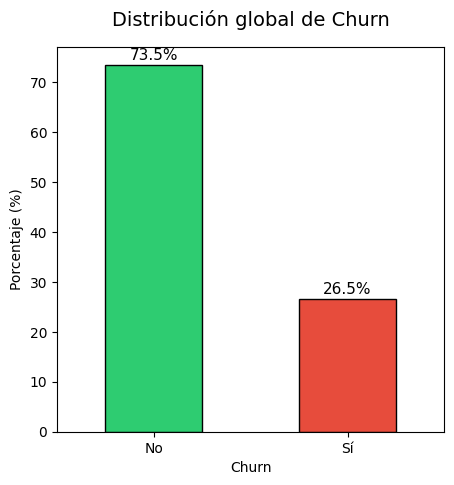

,customer.gender,Churn,porcentaje
0,female,False,73.079128
1,female,True,26.920872
2,male,False,73.839662
3,male,True,26.160338


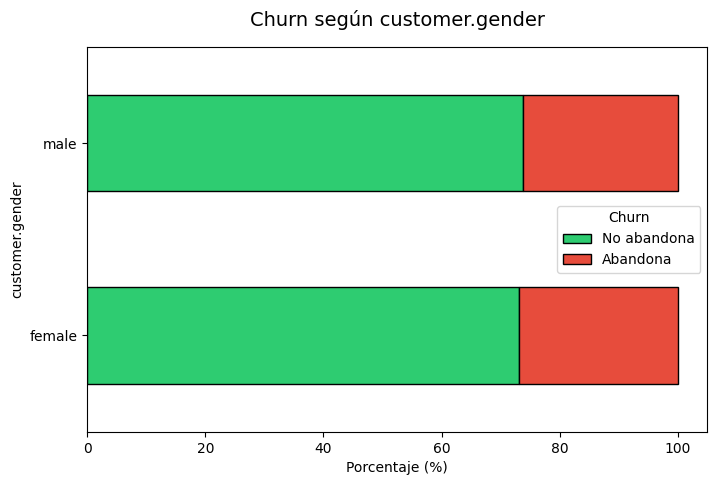

,customer.SeniorCitizen,Churn,porcentaje
0,False,False,76.393832
1,False,True,23.606168
2,True,False,58.318739
3,True,True,41.681261


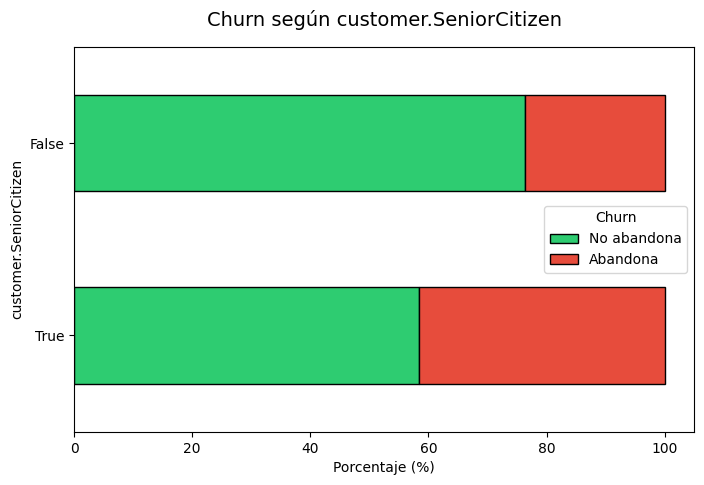

,internet.InternetService,Churn,porcentaje
0,dsl,False,81.040892
1,dsl,True,18.959108
2,fiber optic,False,58.107235
3,fiber optic,True,41.892765
4,no,False,92.595020
5,no,True,7.404980


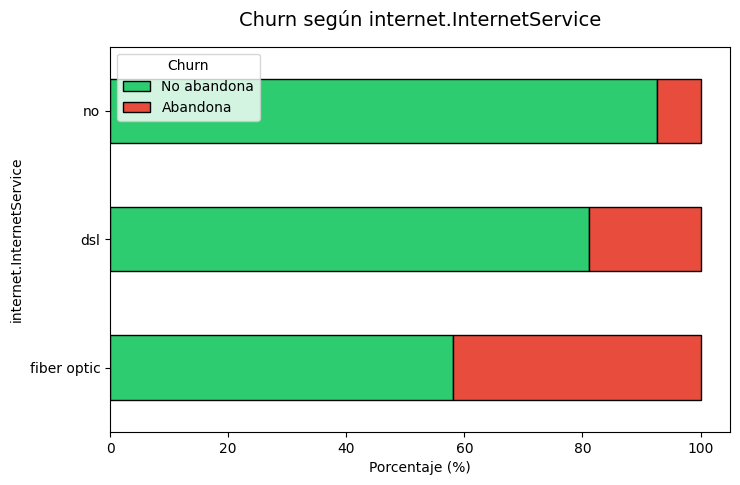

,account.Contract,Churn,porcentaje
0,month to month,False,57.290323
1,month to month,True,42.709677
2,one year,False,88.730482
3,one year,True,11.269518
4,two year,False,97.168142
5,two year,True,2.831858


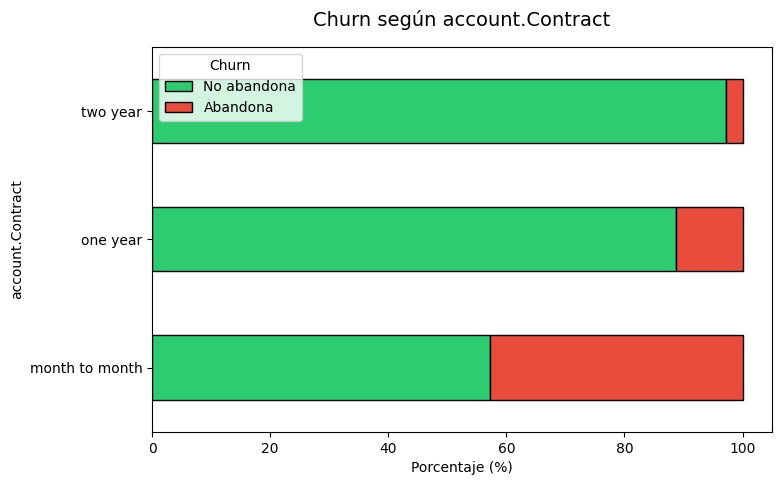

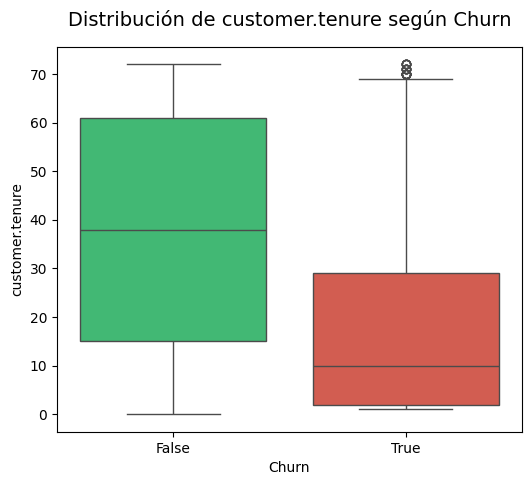

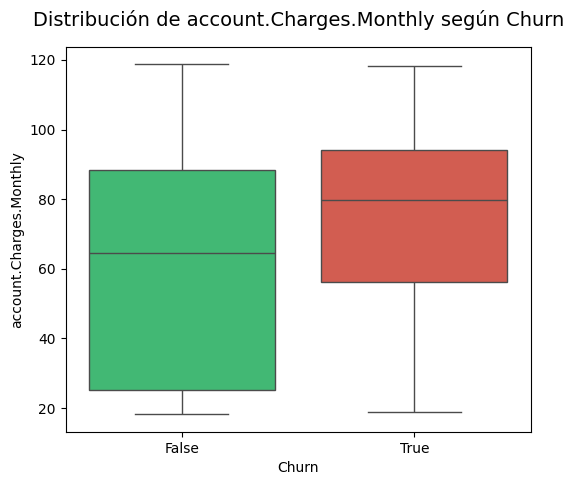

In [29]:

# 1. Distribución global de Churn
fig, ax = plt.subplots(figsize=(5, 5))
df_usuarios["Churn"].value_counts(normalize=True).mul(100).plot(
    kind="bar",
    color=[churn_colors[False], churn_colors[True]],
    edgecolor="black",
    ax=ax
)
ax.set_title("Distribución global de Churn", fontsize=14, pad=15)
ax.set_ylabel("Porcentaje (%)")
ax.set_xticklabels(["No", "Sí"], rotation=0)
for i, v in enumerate(df_usuarios["Churn"].value_counts(normalize=True).mul(100)):
    ax.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=11)

plt.show()


# 2. Recuento de evasión por variables categóricas son 4 gráficos de barras
categoricas = [
    "customer.gender",
    "customer.SeniorCitizen",
    "internet.InternetService",
    "account.Contract"
]

for col in categoricas:
    display(resumen_churn(df_usuarios, col))   # tabla resumen
    grafico_barra_churn(df_usuarios, col)      # gráfico de barras


# 3. Recuento de evasión por variables numéricas - 2 boxplots.
numericas = [
    "customer.tenure",
    "account.Charges.Monthly"
]

for col in numericas:
    grafico_boxplot(df_usuarios, col)


#📄Informe final

# Introducción

El presente análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes llamda "Churn" dentro de una empresa de telecomunicaciones.
El churn representa a los clientes que abandonan el servicio de la empresa y es un desafío para la durabilidad del negocio, ya que se busca retener clientes un tanto más que adquirir nuevos.
En este trabajo se analizaron datos de clientes desde una API con el fin de detectar patrones y extraer insights accionables que permitan diseñar a futuro estrategias de retención de clientes.

#Limpieza y Tratamiento de Datos
Se importó al notebook la base de datos de clientes.
Se realizó la conversión de variables categóricas relevantes.
Se descartaron variables que se consideron para este estudio con poca relevancia para el análisis exploratorio (ej. dependientes, situación familiar).
Se mantuvieron las variables que se consideraron más relacionadas con el problema de churn:

  *   Perfil del cliente: género y senioridad.
  *   Variables de facturación: gasto mensual.
  *   Variables contractuales: tipo de contrato, servicio de internet, antigüedad.

Se realizó la columna pedida para el challenge pero no se la utilizó al considerar que es un gasto que se percibe como mensual y no tanto como diario.




# Análisis Exploratorio de Datos

# Distribución global de Churn
* 73.5% de clientes no abandonaron.
* 26.5% sí abandonaron.

Esto da el punto de partida para todo el churn existe y se busca entender a quiénes y como afecta.

Mayoría de clientes sin Churn (No) rojo:
El 73.5% de los clientes no han experimentado churn, lo que significa que han permanecido con el servicio.

Minoría de clientes con Churn (Sí) verde:
El 26.5% de los clientes sí han experimentado churn, es decir, han cancelado o dejado de utilizar el servicio.

En este caso, la mayoría de los clientes (73.5%) no han abandonado, lo cual es positivo. Sin embargo, el 26.5% de churn representa una proporción significativa de clientes perdidos que podría impactar en los ingresos y la rentabilidad del negocio.



# Antigüedad vs abandono (customer.tenure con boxplot)
Mediana:

La mediana de "customer.tenure" de antigüedad de los que no abandonaron (False) es significativamente mayor que aquellos que sí han abandonado (Churn = True).  
La mediana para los clientes que no abandonan se sitúa alrededor de los 38 meses, mientras que para los que abandonan está cerca de los 10 meses.

Esto sugiere que los clientes con mayor antigüedad tienden a permanecer.

Rango Intercuartílico (IQR):

El IQR (la caja) para los clientes que no abandonan es más amplio que para los que sí abandonan, lo que indica una mayor variabilidad en la antigüedad de los clientes que permanecen.

Distribución:

La distribución de la antigüedad para los clientes que no abandonan es más dispersa y se extiende a valores de antigüedad mucho más altos. La distribución para los clientes que abandonan está fuertemente sesgada hacia valores de antigüedad más bajos, lo que sugiere que el abandono es más común entre los clientes nuevos o con poca antigüedad.

Se observan algunos valores atípicos por encima del límite superior del bigote para los clientes que abandonan, lo que indica que, aunque la mayoría de los clientes que abandonan tienen poca antigüedad, hay algunos casos de clientes con mayor antigüedad que también abandonan.

Se sugiere entonces Los clientes con menor antigüedad los más propensos a realizar "churn".


# Gasto mensual vs abandono (account.Charges.Monthly con boxplot)

Mediana:

La mediana de los cargos mensuales para los clientes que no han abandonado (Churn False verde) se encuentra aproximadamente en 65, lo que indica que el 50% de los clientes que no tuvieron Churn tienen cargos mensuales inferiores o iguales a 65.

La mediana para los clientes que si abandonaron (True rojo) La mediana se sitúa alrededor de 80, lo que sugiere que el 50% de los clientes que sí tuvieron Churn tienen cargos mensuales inferiores o iguales a 80.

Rango Intercuartílico (RIC):

La dispersión de los cargos mensuales, representada por el tamaño de la caja (RIC), el RIC, que representa la extensión de la caja para los que no abandonaron abarca desde aproximadamente 25 (Q1) hasta 90 (Q3). Esto indica que el 50% central de los clientes sin Churn tienen cargos mensuales entre 25 y 90.

Para los que si abandonaron el RIC se extiende desde aproximadamente 55 (Q1) hasta 95 (Q3). Esto significa que el 50% central de los clientes con Churn tienen cargos mensuales entre 55 y 95.


Distinución:

Comparación de Medianas:
La mediana de los clientes con Churn (aprox. 80) es notablemente más alta que la de los clientes sin Churn (aprox. 65), lo que sugiere que los clientes que eventualmente abandonan el servicio tienden a tener cargos mensuales más elevados.

El RIC para los vclientes que no abandonaron es más amplio (aprox. 65 unidades) en comparación con el RIC para los que sí (aprox. 40 unidades), lo que indica una mayor variabilidad en los cargos mensuales para los clientes que no abandonan el servicio, mientras que los clientes que sí lo hacen presentan una distribución más concentrada en el 50% central.

Los clientes que experimentan churn = True tienden a tener cargos mensuales más altos.

Mayor variabilidad en los cargos mensuales de clientes con churn.

La mediana de los cargos mensuales es superior en el grupo con churn, los que abandonaron.

Claramente, la mediana de los cargos mensuales para los clientes que abandonan es significativamente más alta que la mediana de los clientes que no. **Esto refuerza la idea de que los clientes con facturas más elevadas son más propensos a darse de baja.**

# Tipo de servicio contratado vs abandono (internet.InternetService)
DSL:

* Los clientes con servicio DSL muestran una tasa de abandono más alta en comparación con aquellos sin servicio de internet.

Fibra óptica (Fiber Optic):

* Los clientes con fibra óptica presentan la tasa de abandono más alta de los tres grupos, superando el % 40 porciento de abandono.

Sin servicio de internet (No):

* La gran mayoría de los clientes que no tienen un servicio de internet asociado ("no") no abandonan el servicio general, con un porcentaje muy bajo de abandono.


La gráfica y los datos indican que el tipo de servicio de internet está correlacionado con la tasa de abandono de clientes,
 **siendo la fibra óptica el servicio con mayor porcentaje de churn y la ausencia de servicio de internet el que presenta el menor.**

# Tipo de contrato vs abandono (account.Contract)
* Contrato mes a mes (month to month):

  Este tipo de contrato presenta la mayor tasa de abandono.
  
  Aproximadamente el 40% de los clientes con contratos mensuales abandonan el servicio, mientras que el 60% permanece.

* Contrato de un año (one year):

  Los clientes con contratos de un año tienen una tasa de abandono significativamente menor que los de contratos mensuales.
  
  Aproximadamente el 90% de estos clientes no abandona, y solo un 10% lo hace.

* Contrato de dos años (two year):

  Este tipo de contrato muestra la menor tasa de abandono.
  
  Casi todos los clientes con contratos de dos años permanecen, con un porcentaje de abandono muy bajo, cercano al 2 o 3%.

Existe una clara correlación inversa entre la duración del contrato y la tasa de abandono. **Los contratos a largo plazo (uno y dos años) están asociados con una menor probabilidad de que los clientes abandonen el servicio**, siendo el contrato de dos años el que presenta la mayor retención de clientes. **Por el contrario, los contratos mensuales son los que tienen el mayor riesgo de abandono.**

# Edad y género vs abandono

* Genero vs abandono

  * Clientes masculinos:
  
  Aproximadamente el 75% de los clientes de género masculino no abandona, mientras que alrededor del 25% abandona el servicio.
  * Clientes femeninos:

  Aproximadamente el 70% de las clientas de género femenino no abandona, mientras que alrededor del 30% abandona el servicio.

* Edad vs abandono

  * Clientes que no son Senior Citizen (False):
  
  Una gran mayoría de estos clientes (aproximadamente el 75%) no abandona el servicio, mientras que un porcentaje menor (alrededor del 25%) sí lo hace.

  * Clientes que son Senior Citizen (True):

  La proporción de abandono es notablemente mayor. Aproximadamente el 40% de los clientes de la tercera edad abandona, mientras que el 60% restante no lo hace.


**La tasa de abandono es ligeramente mayor entre las clientas de género femenino en comparación con los clientes de género masculino.**

**Los datos sugieren que los clientes de la tercera edad "Senior Citizen" tienen una propensión significativamente mayor a abandonar el servicio en comparación con los clientes más jóvenes.**


#COnclusion general

A partir del análisis de la información histórica sobre Churn, abandono de clientes, se pueden destacar lo siguiente:

* Distribución global de Churn
  
  Aunque la mayoría de los clientes permanecen, el 26.5% representa un segmento relevante que impacta en ingresos y rentabilidad.

* Antigüedad del cliente (Tenure)

  El abandono se concentra principalmente entre los clientes nuevos o con poca fidelidad histórica.

* Gasto mensual (Charges.Monthly)

  Los clientes con facturas más elevadas muestran mayor sensibilidad al precio o a la percepción de valor, lo que los hace más propensos a abandonar.
* Tipo de servicio contratado (InternetService)

  Algunos tipos de servicio pueden generar mayores expectativas de calidad o costos, lo que aumenta la propensión a churn si no se cumplen.

* Tipo de contrato (Contract)

  La duración del contrato es un factor de retención fuerte, los contratos más largos promueven fidelidad o sea, se quedan mas los clientes mas antiguos.

* Perfil del cliente (Edad y Género)

  Segmentos de mayor edad requieren atención especial, quizas este abandono se relaciona con barreras digitales o experiencia de usuario.

  El género tiene un efecto menor aunque el abandono es ligeramente mayor en clientas de género femenino, la diferencia no es significativa para el estudio.


# Estos resultados permiten orientar acciones de retención hacia ofertas de fidelización en los primeros meses, mejoras en la experiencia del servicio de Fibra Óptica y estrategias de precios o beneficios que reduzcan la percepción de costo elevado, por ejemplo.

* Programas de fidelización para clientes nuevos

Implementar incentivos, descuentos o beneficios durante los primeros meses para clientes recientes, disminuyendo la probabilidad de abandono temprano.

* Segmentación según gasto mensual

Monitorear clientes con cargos mensuales altos y ofrecer planes alternativos o beneficios que aumenten la percepción de valor.

* Optimización de servicios de internet

Mejorar la experiencia de clientes con Fibra Óptica y DSL mediante soporte técnico proactivo, garantías de calidad y comunicación clara sobre costos.

* Incentivar contratos a largo plazo

Promocionar planes de 1 y 2 años con descuentos o ventajas adicionales para fomentar la retención y reducir churn en contratos mes a mes.

* Atención especial a clientes de la 3ra edad

Simplificar procesos, brindar asistencia personalizada y considerar métodos de pago más accesibles para clientes mayores.

* Monitoreo continuo y segmentación

Utilizar el análisis de churn histórico para identificar segmentos de riesgo y diseñar campañas preventivas específicas.


